#  Problem Statement

The marketing and analytics team wants to understand how different traffic sources, session behaviors, 
and campaign efforts affect user engagement and conversions on the website. 
The challenge is to use the provided dataset to explore:

- Which traffic sources drive the most valuable traffic?
- Are there certain channels with low engagement or high bounce rates?
- How does session duration relate to conversion rate?
- Are there seasonal or campaign-based spikes in performance?

By answering these questions, we aim to build a data-driven foundation for optimizing marketing spend, website design, and content strategy.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data-export (1).csv")
df.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


In [3]:
df.columns = df.iloc[0]
df = df.drop(index=0).reset_index(drop=True)
df.columns = ['channel group','Date + hour','Users','Sessions','Engaged sessions','Average engagement time','Engaged sessions per user','Events per session','Engagement rate','Event count']
df.head()

,channel group,Date + hour,Users,Sessions,Engaged sessions,Average engagement time,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   channel group              3182 non-null   object
 1   Date + hour                3182 non-null   object
 2   Users                      3182 non-null   object
 3   Sessions                   3182 non-null   object
 4   Engaged sessions           3182 non-null   object
 5   Average engagement time    3182 non-null   object
 6   Engaged sessions per user  3182 non-null   object
 7   Events per session         3182 non-null   object
 8   Engagement rate            3182 non-null   object
 9   Event count                3182 non-null   object
dtypes: object(10)
memory usage: 248.7+ KB


In [5]:
df['Date + hour']=pd.to_datetime(df['Date + hour'],format='%Y%m%d%H',errors = 'coerce')
dropped_coloumns = df.columns.drop(['channel group','Date + hour']) # List of coloumns except the dropped
dropped_coloumns


Index(['Users', 'Sessions', 'Engaged sessions', 'Average engagement time',
       'Engaged sessions per user', 'Events per session', 'Engagement rate',
       'Event count'],
      dtype='object')

In [6]:
df[dropped_coloumns]=df[dropped_coloumns].apply(pd.to_numeric,errors='coerce')
df['Hour']= df['Date + hour'].dt.hour
df.head()

,channel group,Date + hour,Users,Sessions,Engaged sessions,Average engagement time,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   channel group              3182 non-null   object        
 1   Date + hour                3182 non-null   datetime64[ns]
 2   Users                      3182 non-null   int64         
 3   Sessions                   3182 non-null   int64         
 4   Engaged sessions           3182 non-null   int64         
 5   Average engagement time    3182 non-null   float64       
 6   Engaged sessions per user  3182 non-null   float64       
 7   Events per session         3182 non-null   float64       
 8   Engagement rate            3182 non-null   float64       
 9   Event count                3182 non-null   int64         
 10  Hour                       3182 non-null   int32         
dtypes: datetime64[ns](1), float64(4), int32(1), int64(4), object(1)
memor

In [8]:
df.describe()

,Date + hour,Users,Sessions,Engaged sessions,Average engagement time,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


# Pie Chart Of Users By Channel Group

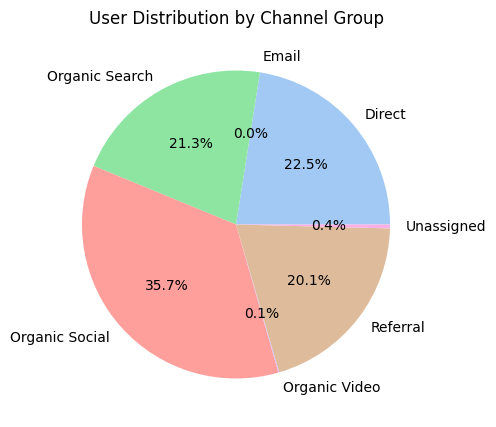

In [9]:
channel_user_share = df.groupby("channel group")['Users'].sum()

plt.figure(figsize=(5, 5))
plt.pie(channel_user_share, labels=channel_user_share.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"))
plt.title("User Distribution by Channel Group")
plt.show()

Insights
- Top Contributing Channel(s)
- Underperforming or Low-Traffic Channels
- Opportunities for Growth

# Session and User Over Time

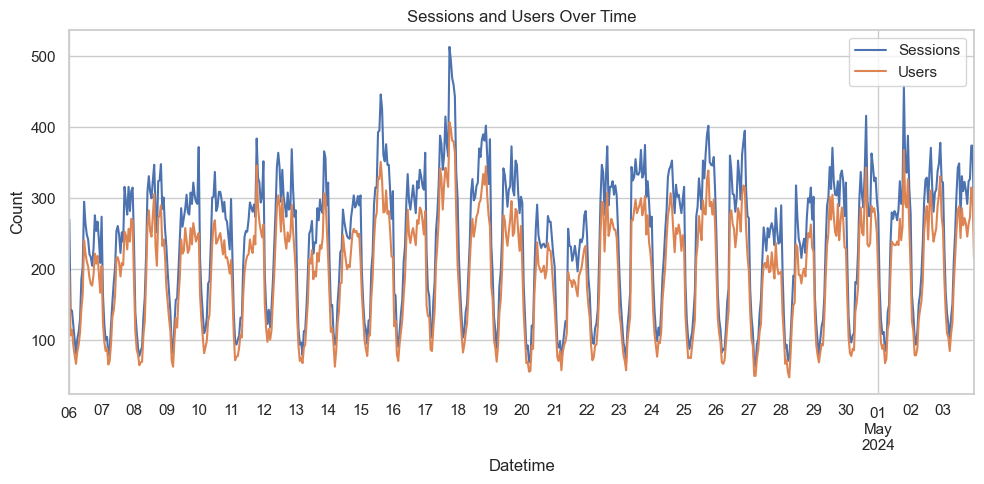

In [10]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
df.groupby("Date + hour")[["Sessions", "Users"]].sum().plot(ax=plt.gca())
plt.title("Sessions and Users Over Time")
plt.xlabel("Datetime")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

Insights
-  Peak Activity Periods
-  Low Engagement Windows

 Recommendations
- Schedule promotional content or ads during peak hours to maximize visibility.
- Consider offering personalized content during peak hours to capitalize on high engagement.

# Total User By Channel

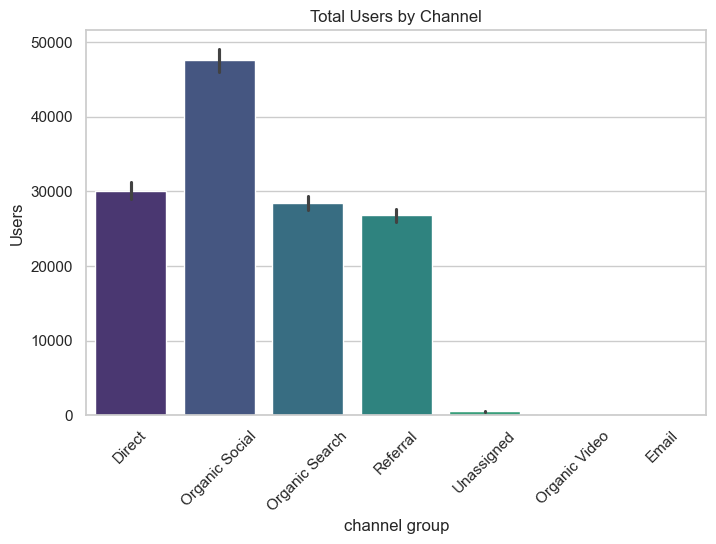

In [11]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="channel group", y="Users", estimator=np.sum, hue="channel group", palette="viridis",legend=False)
plt.title("Total Users by Channel")
plt.xticks(rotation=45)
plt.show()

Insights
- Organic Social leads all channels, highlighting successful SEO efforts and strong organic presence.
- Email,Organic Video and Unassigned channels contribute minimally, suggesting potential to optimize or expand efforts in those areas.

# Average Engagement time

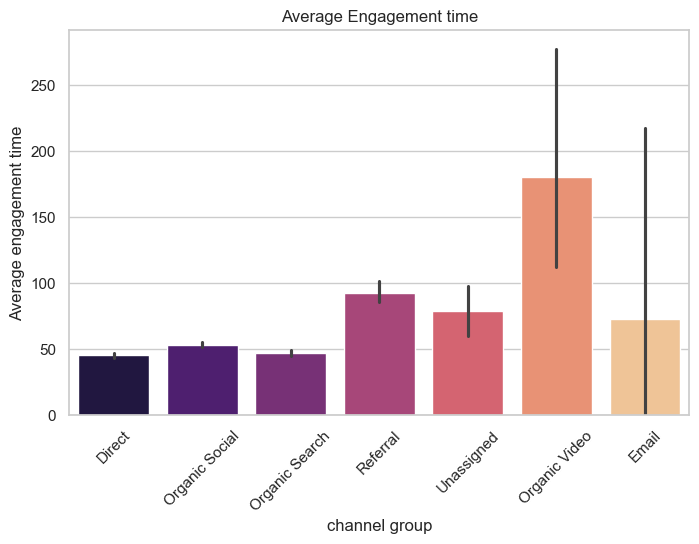

In [13]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="channel group", y="Average engagement time", estimator=np.mean, hue="channel group", palette="magma",legend=False)
plt.title("Average Engagement time")
plt.xticks(rotation=45)
plt.show()

Insights
- Referral and Email drive users who spend the most time on the platform, likely due to targeted or pre-informed visits.
- Organic Search and Direct Traffic offer balanced performance — steady engagement with good traffic volume.

Recommendations
- Rework ad campaigns with poor engagement to ensure better targeting and alignment between ads and landing pages.

# Engagement Rate Distribution by Channel

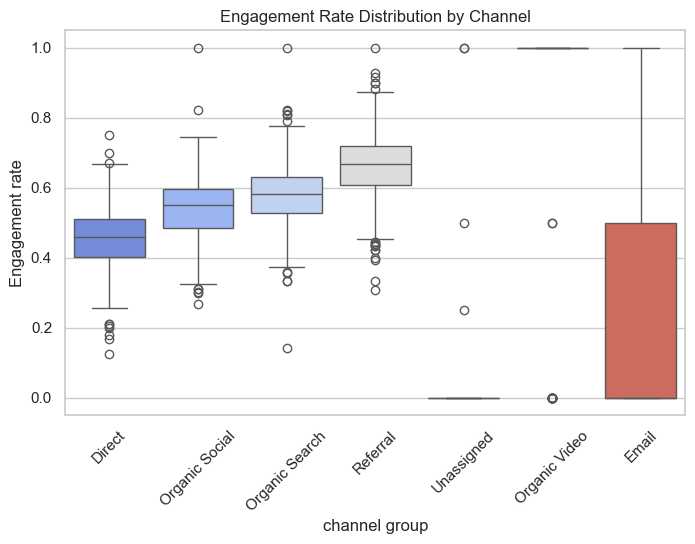

In [26]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x="channel group", y="Engagement rate", hue="channel group", palette="coolwarm", legend=False)
plt.title("Engagement Rate Distribution by Channel")
plt.xticks(rotation=45)
plt.show()


Insights
- Referral and Organic Search sources show higher and more consistent engagement, highlighting strong targeting or pre-qualified users.
- Organic Social performs consistently, which means the content is relevant and useful to users.

 Recommendations
- Focus on scaling high-performing channels like Referral and Email to improve automation and retargeting.
- For underperforming paid channels, improve ad targeting and landing page relevance.

# Engaged vs Non Engaged

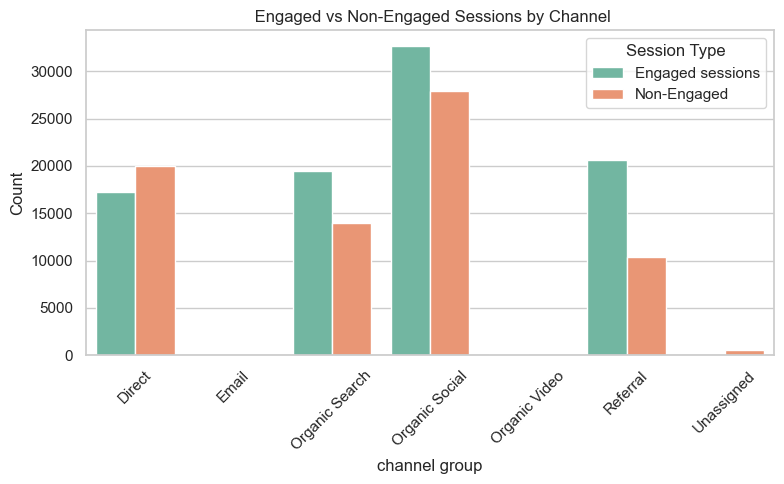

In [15]:
session_df = df.groupby("channel group")[["Sessions", "Engaged sessions"]].sum().reset_index()
session_df["Non-Engaged"] = session_df["Sessions"] - session_df["Engaged sessions"]
session_df_melted = session_df.melt(
    id_vars="channel group",
    value_vars=["Engaged sessions", "Non-Engaged"],
    var_name="Session Type",
    value_name="Count"
)

plt.figure(figsize=(8, 5))
sns.barplot(data=session_df_melted, x="channel group", y="Count", hue="Session Type", palette="Set2")
plt.title(" Engaged vs Non-Engaged Sessions by Channel")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Insights
- Organic Search and Direct drive more engaged users, showing content relevance and strong user interest.
- Channels such as Display or Referral may show a higher number of non-engaged sessions, suggesting the landing pages or targeting may not be effective .

Recommendation
- Invest More in High-Performing Channels.
- Optimize Low-Engagement Channels
- Regularly track and optimize based on engagement rates rather than just raw session counts.

# Traffic By Hour And Channel

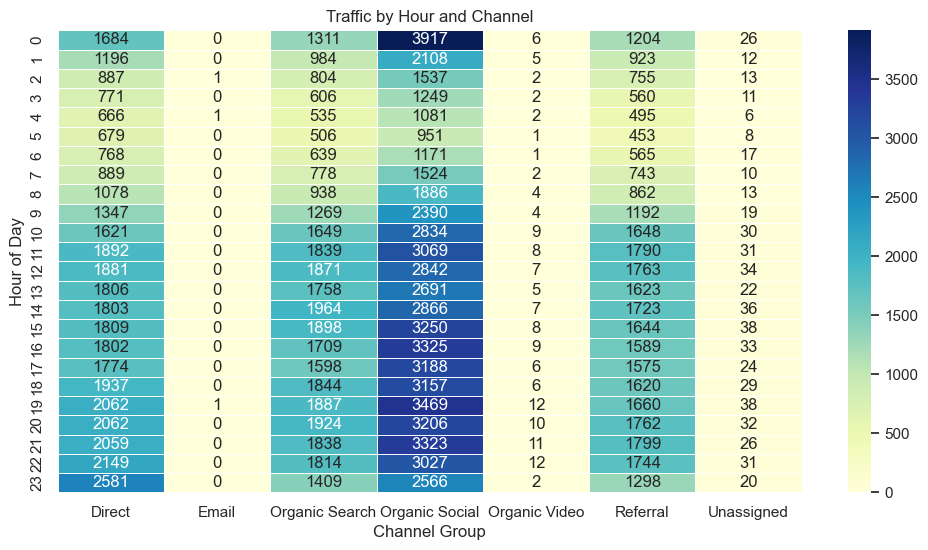

In [16]:
heatmap_data = df.groupby(["Hour", "channel group"])["Sessions"].sum().unstack().fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=0.5, annot=True,fmt='.0f')
plt.title("Traffic by Hour and Channel")
plt.xlabel("Channel Group")
plt.ylabel("Hour of Day")
plt.show()

Insights
- Peak Activity Hours: Most channels show higher traffic at mid afternoon and end of evening, indicating this is when users are most active.
- Organic Search and Direct traffic dominate during mid-day hours.
- Organic Video and Unassigned channels show relatively lower traffic across all hours, with occasional small spikes.

Recommendation
- Schedule key content releases or campaigns during peak activity hours .

# Engagement Rate vs Session Over Time

In [17]:
df.head()

,channel group,Date + hour,Users,Sessions,Engaged sessions,Average engagement time,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


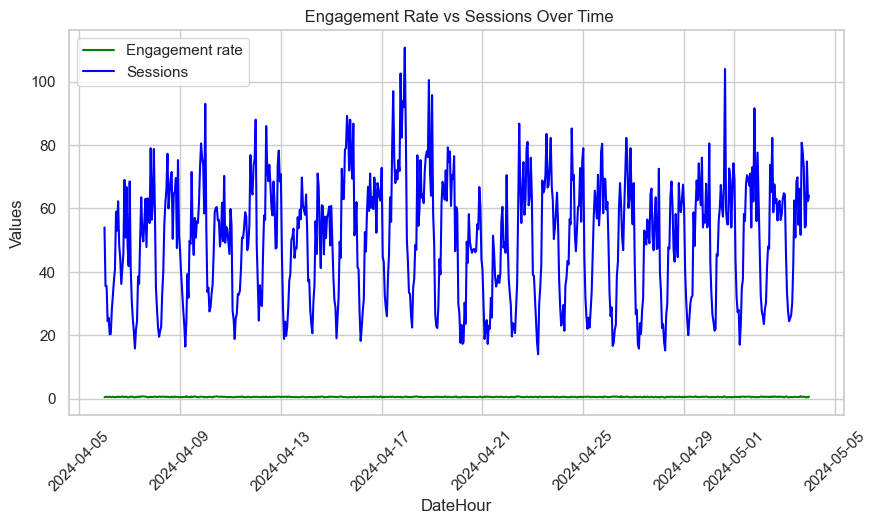

In [18]:
df_plot = df.groupby("Date + hour")[["Engagement rate", "Sessions"]].mean().reset_index()

plt.figure(figsize=(10, 5))

plt.plot(df_plot["Date + hour"], df_plot["Engagement rate"], label="Engagement rate", color="green")
plt.plot(df_plot["Date + hour"], df_plot["Sessions"], label="Sessions", color="blue")

plt.title(" Engagement Rate vs Sessions Over Time")
plt.xticks(rotation=45)
plt.xlabel("DateHour")
plt.ylabel("Values")
plt.legend()
plt.grid(True)

plt.show()

Insights
- When sessions rise, engagement rate often drops — high traffic doesn't always mean quality engagement.
- Engagement Stability: Engagement rate is relatively more stable compared to fluctuating session volumes.
- Fewer sessions sometimes mean better engagement, highlighting more interested users.

Recommendation
- Focus on enhancing content relevance during high-traffic periods to maintain or improve engagement rates.
- Monitor what’s being promoted during engagement spikes to replicate successful strategies.

# Bounce Rate by Channel Group

In [19]:
session_df


,channel group,Sessions,Engaged sessions,Non-Engaged
0,Direct,37203,17243,19960
1,Email,3,1,2
2,Organic Search,33372,19425,13947
3,Organic Social,60627,32697,27930
4,Organic Video,141,109,32
5,Referral,30990,20653,10337
6,Unassigned,559,4,555


In [20]:
session_df['Bounce Rate']= session_df['Non-Engaged']/session_df['Sessions']*100

session_df

,channel group,Sessions,Engaged sessions,Non-Engaged,Bounce Rate
0,Direct,37203,17243,19960,53.651587
1,Email,3,1,2,66.666667
2,Organic Search,33372,19425,13947,41.792521
3,Organic Social,60627,32697,27930,46.068583
4,Organic Video,141,109,32,22.695035
5,Referral,30990,20653,10337,33.355921
6,Unassigned,559,4,555,99.284436


In [21]:
channel_bounce_df = session_df.groupby("channel group")[["Sessions", "Non-Engaged","Bounce Rate"]].sum().reset_index()
channel_bounce_df = channel_bounce_df.sort_values(by="Bounce Rate", ascending=False)
channel_bounce_df

,channel group,Sessions,Non-Engaged,Bounce Rate
6,Unassigned,559,555,99.284436
1,Email,3,2,66.666667
0,Direct,37203,19960,53.651587
3,Organic Social,60627,27930,46.068583
2,Organic Search,33372,13947,41.792521
5,Referral,30990,10337,33.355921
4,Organic Video,141,32,22.695035


In [22]:
channel_bounce_df = session_df.groupby("channel group")[["Sessions", "Non-Engaged","Bounce Rate"]].sum().reset_index()
channel_bounce_df = channel_bounce_df.sort_values(by="Bounce Rate", ascending=False)
channel_bounce_df

,channel group,Sessions,Non-Engaged,Bounce Rate
6,Unassigned,559,555,99.284436
1,Email,3,2,66.666667
0,Direct,37203,19960,53.651587
3,Organic Social,60627,27930,46.068583
2,Organic Search,33372,13947,41.792521
5,Referral,30990,10337,33.355921
4,Organic Video,141,32,22.695035


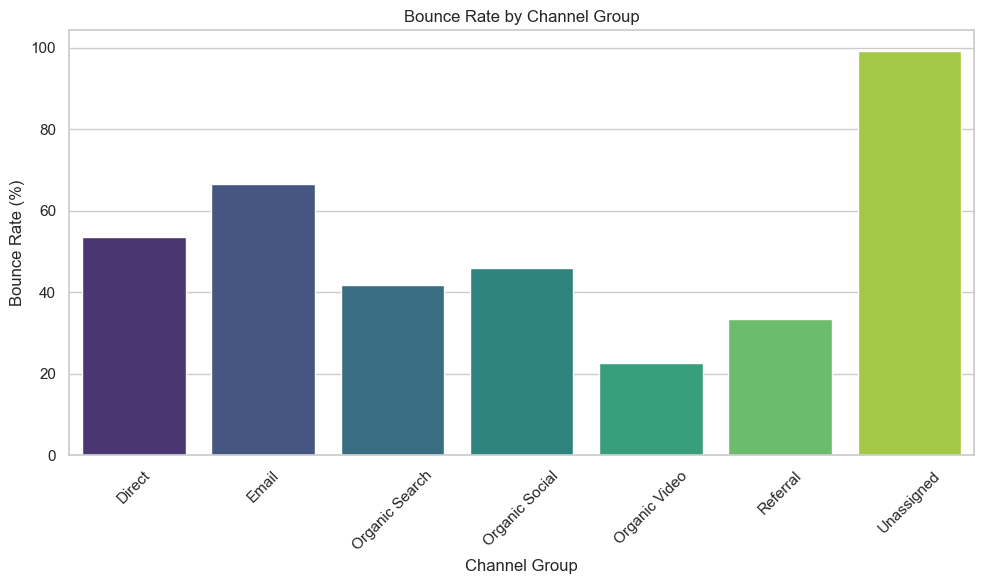

In [27]:
channel_bounce_df = session_df.groupby("channel group")[["Sessions", "Non-Engaged","Bounce Rate"]].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=channel_bounce_df, x="channel group", y="Bounce Rate", hue="channel group", palette="viridis")
plt.title("Bounce Rate by Channel Group")
plt.xlabel("Channel Group")
plt.ylabel("Bounce Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Conversion Rate by Channel Group

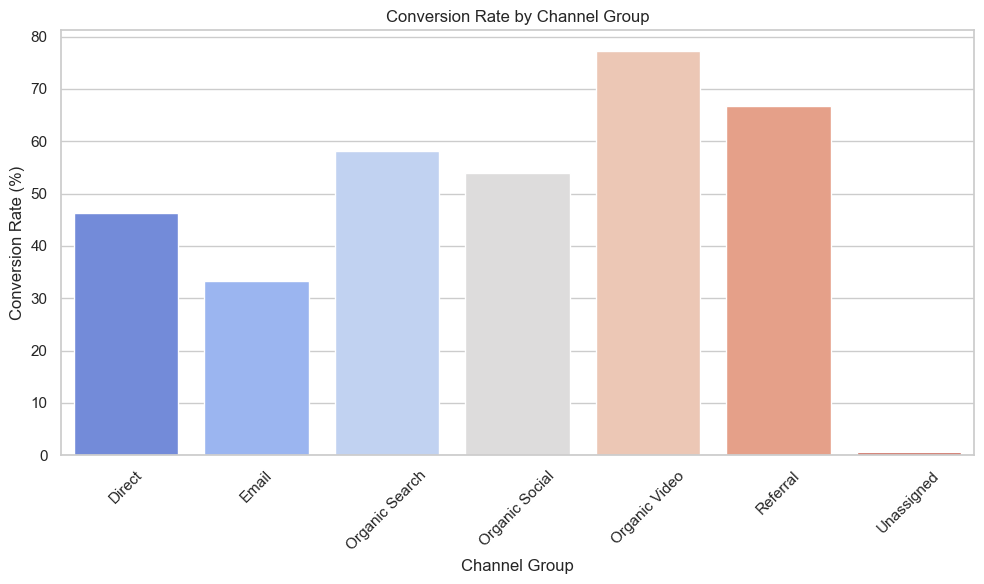

In [31]:
session_df["Conversion Rate"]= (session_df['Engaged sessions']/session_df['Sessions'])*100
heatmap_data1 = session_df.groupby("channel group")[["Sessions", "Engaged sessions","Conversion Rate"]].sum().reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=heatmap_data1, x="channel group", y="Conversion Rate",hue="channel group", palette="coolwarm")
plt.title("Conversion Rate by Channel Group")
plt.xlabel("Channel Group")
plt.ylabel("Conversion Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()                                                  

# Conversion Rate AND Bounce Rate BY Channel Group 

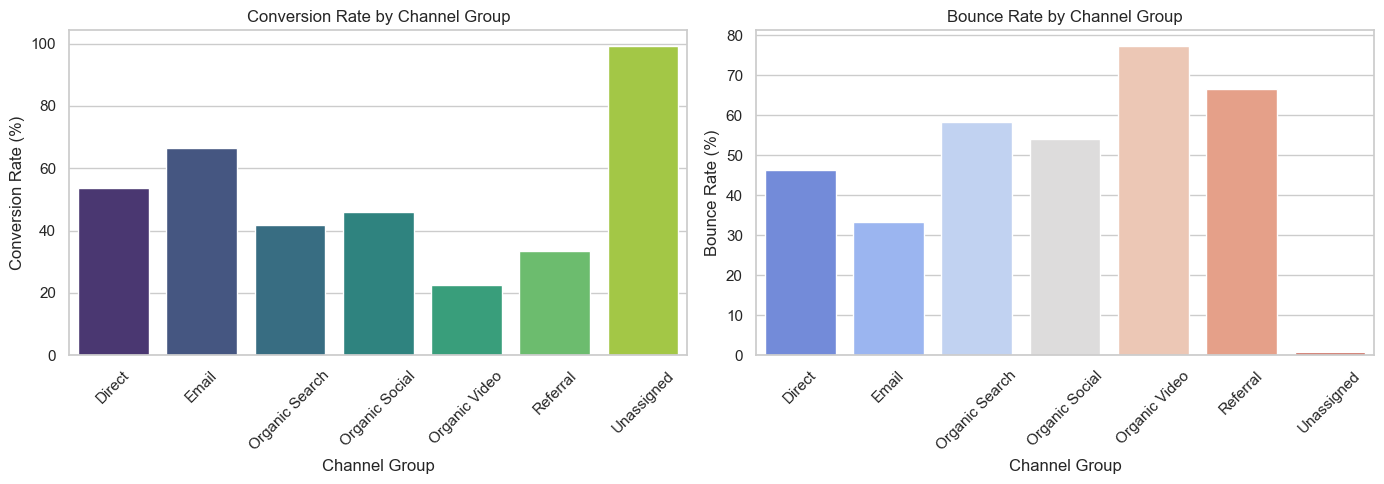

In [34]:
channel_bounce_df = session_df.groupby("channel group")[["Sessions", "Non-Engaged", "Bounce Rate"]].sum().reset_index()
# session_df["Conversion_Rate"] = (session_df['Engaged sessions'] / session_df['Sessions']) * 100
heatmap_data1 = session_df.groupby("channel group")[["Sessions", "Engaged sessions", "Conversion Rate"]].sum().reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(data=heatmap_data1, x="channel group", y="Conversion Rate",hue="channel group", palette="coolwarm", ax=ax2)
ax1.set_title("Conversion Rate by Channel Group")
ax1.set_xlabel("Channel Group")
ax1.set_ylabel("Conversion Rate (%)")
ax1.tick_params(axis='x', rotation=45)

sns.barplot(data=channel_bounce_df, x="channel group", y="Bounce Rate",hue="channel group", palette="viridis", ax=ax1)
ax2.set_title("Bounce Rate by Channel Group")
ax2.set_xlabel("Channel Group")
ax2.set_ylabel("Bounce Rate (%)")
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Insights
- Unassigned and Email show high conversions and low bounce, indicating effective and relevant user engagement.
- Referral and Organic Video show the opposite—high bounce and low conversion, hinting at misaligned landing pages or weak audience targeting.

Recommendation
-Prioritize and scale efforts in Unassigned and Email, as they drive engaged and converting traffic.
- Identify and evaluate referral partners. Improve landing page relevance or discontinue low-quality referral links.
- Improve Paid Campaign Effectiveness

In [35]:
df["Conversion_Rate"]= (df['Engaged sessions']/df['Sessions'])*100
df["Non-Engaged"] = df["Sessions"] - df["Engaged sessions"]
df['Bounce Rate']= df['Non-Engaged']/df['Sessions']*100
df.head()

,channel group,Date + hour,Users,Sessions,Engaged sessions,Average engagement time,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour,Conversion_Rate,Non-Engaged,Bounce Rate
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23,48.000000,156,52.000000
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19,49.438202,135,50.561798
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23,49.356223,118,50.643777
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18,48.828125,131,51.171875
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20,50.678733,109,49.321267


# Select Key Engagement Columns

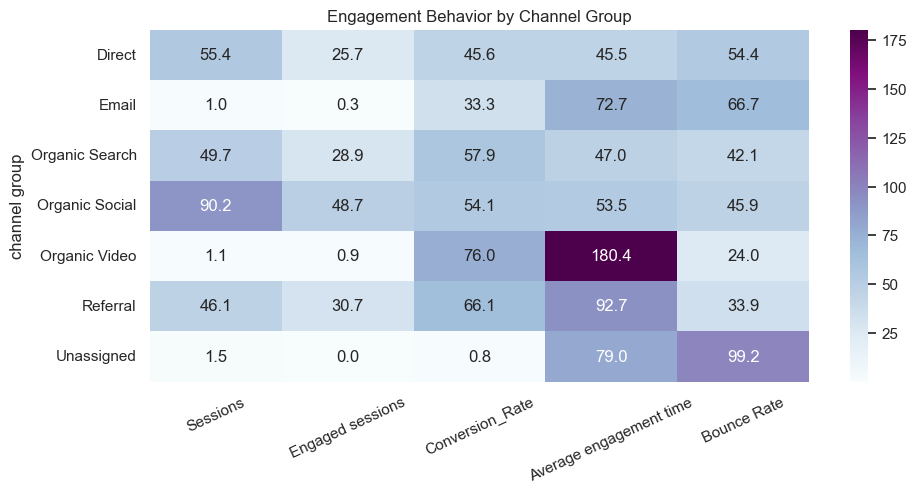

In [36]:
channel_engagement_df = df.groupby("channel group")[[
    "Sessions", "Engaged sessions", "Conversion_Rate", "Average engagement time", "Bounce Rate"
]].mean().reset_index()

plt.figure(figsize=(10,6))
sns.heatmap(channel_engagement_df.set_index("channel group"), annot=True, fmt=".1f", cmap="BuPu")
plt.title("Engagement Behavior by Channel Group")
plt.tight_layout()
plt.xticks(rotation=25)
plt.show()

Insights
- Referral and Organic Video have high Conversion Rate and Low Bounce Rate are very effective in driving quality user actions.
- Organic Search have consistently good across most metrics: high engaged sessions, conversion, and moderate bounce.
- Lower engagement and higher bounce — may indicate irrelevant targeting or poor landing page experience.

Recommendation
- Double down on Referral and Organic Video by replicating successful strategies across weaker channels.
- Improve targeting and landing page content for Email and unassigned to boost relevance.


# Key Insights

- Referral and Organic Video channels show the highest conversion rates and lowest bounce rates, reflecting high-quality, goal-oriented traffic.
- Organic Social and Referral drive more engaged sessions, indicating that users from these sources find relevant content and stay longer.
- Engagement rate and session trends over time show an inverse relationship, higher traffic doesn't always lead to better engagement.
- Most traffic occurs during specific peak hours, making it ideal for timing campaigns and content drops for maximum visibility.

# Summary

This Website Performance Analysis Project used Python libraries like Pandas, Seaborn, and Matplotlib to explore user behavior, traffic sources, 
and engagement trends. Through visualizations and metrics, the analysis identified high-performing channels, weak touchpoints, and optimal user 
engagement windows that helping guide strategic decisions on marketing focus, content delivery, and traffic source optimization.